# Moving Average
This strategy does not look at the current price but instead at the moving average of the price pa. We will consider different time intervals for calculating the moving average: two hours, six hours, one day, seven days, 30 days, 100 days, and 200 days. The liquidity position of this strategy will be [pa − a, pa + a]. As in the constant interval strategy 4.3, the leftover token will not be used to provide any liquidity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import date, timedelta

from demeter import (
    TokenInfo,
    Actuator,
    Strategy,
    RowData,
    simple_moving_average,
    ChainType,
    MarketInfo,
    PeriodTrigger,
    BaseAction
)
from demeter.result import performance_metrics, round_results
from demeter.uniswap import UniV3Pool, UniLpMarket


In [2]:
pd.options.display.max_columns = None
pd.set_option("display.width", 5000)

2024-10-30 11:55:40,689 - INFO - Qute token is USDC
2024-10-30 11:55:40,691 - INFO - init strategy...
2024-10-30 11:55:40,865 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:22<00:00, 3185.41it/s]
2024-10-30 11:57:03,610 - INFO - main loop finished
2024-10-30 11:57:08,153 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1848.9482                ETH       :0.70833574               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  442.35365  0.13226859  10400319314274905

Quote by: USDC
Account balance history                           


2024-10-30 11:57:09,407 - INFO - Backtesting finished, execute time 88.73247289657593s
2024-10-30 11:57:09,587 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 11:57:13,668 - INFO - load file complete, preparing...
2024-10-30 11:57:19,051 - INFO - data has been prepared
2024-10-30 11:57:19,468 - INFO - Qute token is USDC
2024-10-30 11:57:19,468 - INFO - init strategy...
2024-10-30 11:57:19,640 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:22<00:00, 3198.21it/s]
2024-10-30 11:58:42,048 - INFO - main loop finished
2024-10-30 11:58:46,061 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1865.4632                ETH       :0.71537767               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  438.88263  0.13123075  10318657345196993

Quote by: USDC
Account balance history                           


2024-10-30 11:58:47,299 - INFO - Backtesting finished, execute time 87.83141708374023s
2024-10-30 11:58:47,474 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 11:58:51,407 - INFO - load file complete, preparing...
2024-10-30 11:58:56,859 - INFO - data has been prepared
2024-10-30 11:58:57,253 - INFO - Qute token is USDC
2024-10-30 11:58:57,253 - INFO - init strategy...
2024-10-30 11:58:57,406 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:22<00:00, 3192.01it/s]
2024-10-30 12:00:19,963 - INFO - main loop finished
2024-10-30 12:00:24,574 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1828.1836                ETH       :0.68733729               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  451.58062  0.13502746  10617404746453927

Quote by: USDC
Account balance history                           


2024-10-30 12:00:25,792 - INFO - Backtesting finished, execute time 88.55443263053894s
2024-10-30 12:00:25,962 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:00:30,011 - INFO - load file complete, preparing...
2024-10-30 12:00:35,358 - INFO - data has been prepared
2024-10-30 12:00:35,758 - INFO - Qute token is USDC
2024-10-30 12:00:35,759 - INFO - init strategy...
2024-10-30 12:00:35,914 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:21<00:00, 3218.78it/s]
2024-10-30 12:01:57,783 - INFO - main loop finished
2024-10-30 12:02:01,815 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.0793                ETH       :0.68128260               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  451.58062  0.13502746  10617404746453927

Quote by: USDC
Account balance history                           


2024-10-30 12:02:03,065 - INFO - Backtesting finished, execute time 87.31617069244385s
2024-10-30 12:02:03,247 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-10-30 12:02:07,092 - INFO - load file complete, preparing...
2024-10-30 12:02:12,770 - INFO - data has been prepared
2024-10-30 12:02:13,268 - INFO - Qute token is USDC
2024-10-30 12:02:13,269 - INFO - init strategy...
2024-10-30 12:02:13,442 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:26<00:00, 3053.07it/s]
2024-10-30 12:03:39,756 - INFO - main loop finished
2024-10-30 12:03:44,438 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1743.5995                ETH       :0.65553641               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  451.58062  0.13502746  10617404746453927

Quote by: USDC
Account balance history                           


2024-10-30 12:03:45,641 - INFO - Backtesting finished, execute time 92.38624453544617s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

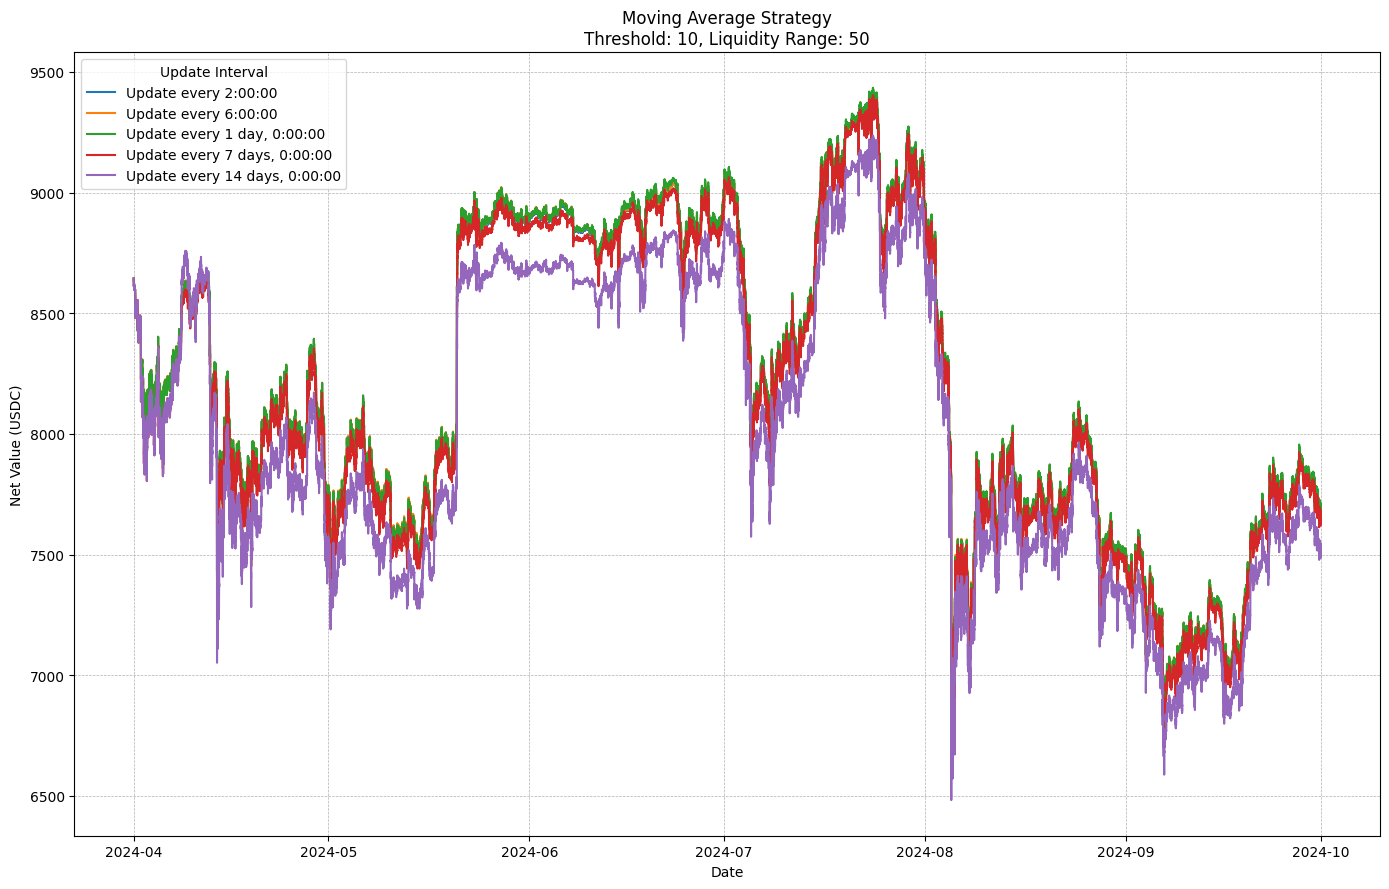

2024-10-30 12:03:46,288 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:03:50,272 - INFO - load file complete, preparing...
2024-10-30 12:03:55,705 - INFO - data has been prepared
2024-10-30 12:03:56,102 - INFO - Qute token is USDC
2024-10-30 12:03:56,102 - INFO - init strategy...
2024-10-30 12:03:56,269 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3099.35it/s]
2024-10-30 12:05:21,293 - INFO - main loop finished
2024-10-30 12:05:26,043 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1863.0696                ETH       :0.71374567               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  380.22691  0.11401975  5002175265545905

Quote by: USDC
Account balance history                           


2024-10-30 12:05:27,293 - INFO - Backtesting finished, execute time 91.1904661655426s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:05:27,530 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:05:31,922 - INFO - load file complete, preparing...
2024-10-30 12:05:37,275 - INFO - data has been prepared
2024-10-30 12:05:37,673 - INFO - Qute token is USDC
2024-10-30 12:05:37,674 - INFO - init strategy...
2024-10-30 12:05:37,827 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3114.72it/s]
2024-10-30 12:07:02,433 - INFO - main loop finished
2024-10-30 12:07:06,561 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1879.4841                ETH       :0.72075449               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  377.24238  0.11312478  4962898828975670

Quote by: USDC
Account balance history                           


2024-10-30 12:07:07,811 - INFO - Backtesting finished, execute time 90.15655589103699s
2024-10-30 12:07:07,997 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:07:12,198 - INFO - load file complete, preparing...
2024-10-30 12:07:17,676 - INFO - data has been prepared
2024-10-30 12:07:18,079 - INFO - Qute token is USDC
2024-10-30 12:07:18,080 - INFO - init strategy...
2024-10-30 12:07:18,226 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3111.49it/s]
2024-10-30 12:08:42,919 - INFO - main loop finished
2024-10-30 12:08:47,615 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1842.7516                ETH       :0.69281435               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  388.16072  0.11639886  5106585461669961

Quote by: USDC
Account balance history                           


2024-10-30 12:08:48,865 - INFO - Backtesting finished, execute time 90.80508995056152s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:08:49,048 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:08:53,164 - INFO - load file complete, preparing...
2024-10-30 12:08:58,597 - INFO - data has been prepared
2024-10-30 12:08:58,997 - INFO - Qute token is USDC
2024-10-30 12:08:58,997 - INFO - init strategy...
2024-10-30 12:08:59,148 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3109.47it/s]
2024-10-30 12:10:23,911 - INFO - main loop finished
2024-10-30 12:10:27,989 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.5189                ETH       :0.68671142               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  388.16072  0.11639886  5106585461669961

Quote by: USDC
Account balance history                           


2024-10-30 12:10:29,219 - INFO - Backtesting finished, execute time 90.22226810455322s
2024-10-30 12:10:29,405 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:10:33,368 - INFO - load file complete, preparing...
2024-10-30 12:10:38,768 - INFO - data has been prepared
2024-10-30 12:10:39,167 - INFO - Qute token is USDC
2024-10-30 12:10:39,167 - INFO - init strategy...
2024-10-30 12:10:39,317 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3109.77it/s]
2024-10-30 12:12:04,057 - INFO - main loop finished
2024-10-30 12:12:08,188 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1757.4934                ETH       :0.66076007               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  388.16072  0.11639886  5106585461669961

Quote by: USDC
Account balance history                           


2024-10-30 12:12:09,424 - INFO - Backtesting finished, execute time 90.25776219367981s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

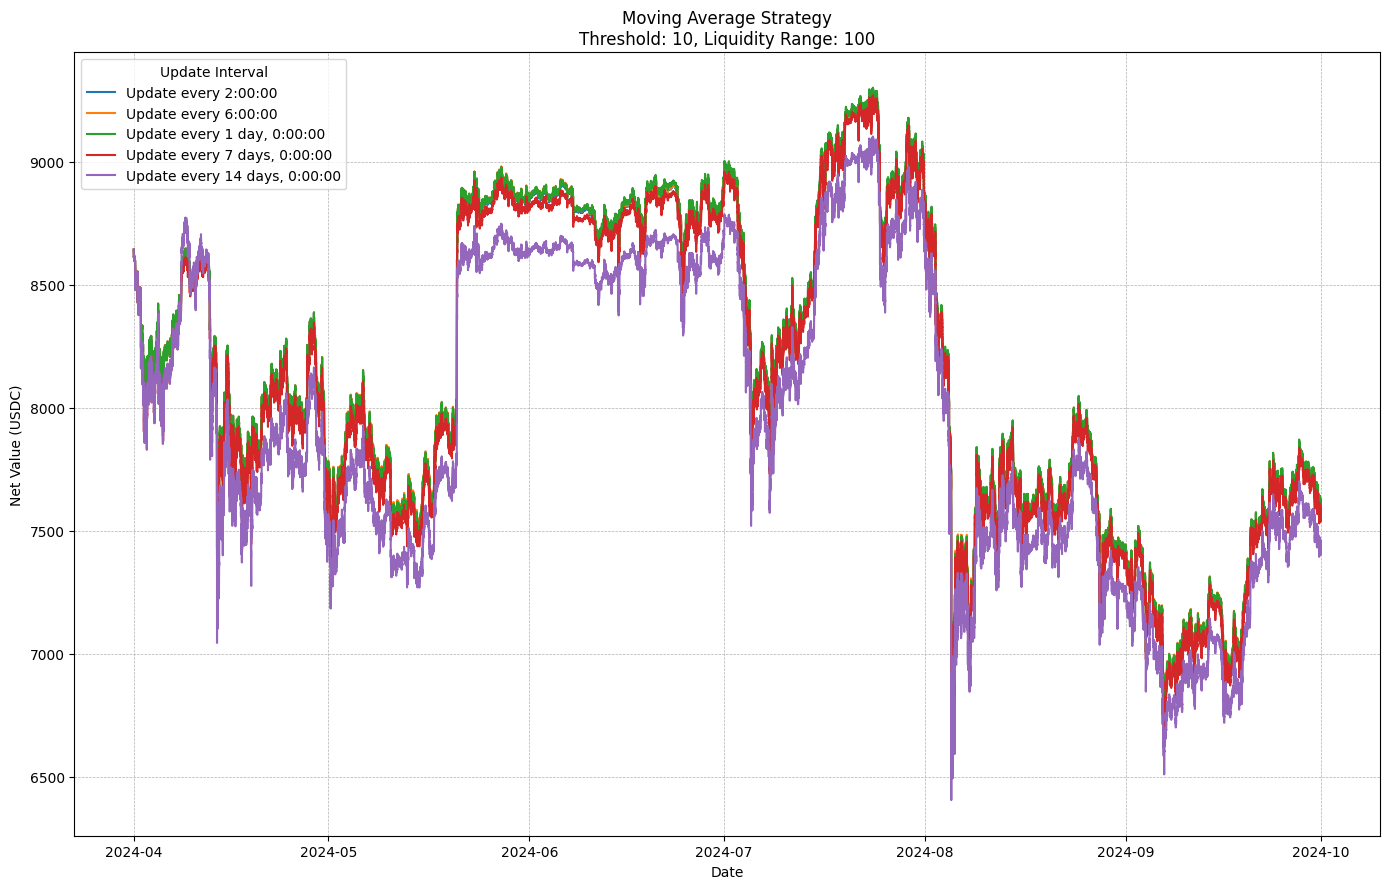

2024-10-30 12:12:10,023 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:12:14,055 - INFO - load file complete, preparing...
2024-10-30 12:12:19,454 - INFO - data has been prepared
2024-10-30 12:12:19,857 - INFO - Qute token is USDC
2024-10-30 12:12:19,857 - INFO - init strategy...
2024-10-30 12:12:20,006 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3082.52it/s]
2024-10-30 12:13:45,497 - INFO - main loop finished
2024-10-30 12:13:49,629 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1869.6978                ETH       :0.71628496               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  352.40812  0.10718522  2468420953631414

Quote by: USDC
Account balance history                           


2024-10-30 12:13:50,894 - INFO - Backtesting finished, execute time 91.04233503341675s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:13:51,105 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:13:55,527 - INFO - load file complete, preparing...
2024-10-30 12:14:00,975 - INFO - data has been prepared
2024-10-30 12:14:01,359 - INFO - Qute token is USDC
2024-10-30 12:14:01,359 - INFO - init strategy...
2024-10-30 12:14:01,512 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3083.35it/s]
2024-10-30 12:15:26,977 - INFO - main loop finished
2024-10-30 12:15:31,683 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1886.0652                ETH       :0.72327824               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  349.64160  0.10634378  2449039229907793

Quote by: USDC
Account balance history                           


2024-10-30 12:15:32,913 - INFO - Backtesting finished, execute time 91.5536515712738s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:15:33,114 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:15:37,112 - INFO - load file complete, preparing...
2024-10-30 12:15:42,415 - INFO - data has been prepared
2024-10-30 12:15:42,816 - INFO - Qute token is USDC
2024-10-30 12:15:42,816 - INFO - init strategy...
2024-10-30 12:15:42,978 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:27<00:00, 3007.67it/s]
2024-10-30 12:17:10,595 - INFO - main loop finished
2024-10-30 12:17:14,744 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1849.5894                ETH       :0.69538515               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  359.76244  0.10942203  2519944201459329

Quote by: USDC
Account balance history                           


2024-10-30 12:17:16,000 - INFO - Backtesting finished, execute time 93.18855142593384s
2024-10-30 12:17:16,183 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:17:20,284 - INFO - load file complete, preparing...
2024-10-30 12:17:25,649 - INFO - data has been prepared
2024-10-30 12:17:26,049 - INFO - Qute token is USDC
2024-10-30 12:17:26,049 - INFO - init strategy...
2024-10-30 12:17:26,200 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:30<00:00, 2909.24it/s]
2024-10-30 12:18:56,780 - INFO - main loop finished
2024-10-30 12:19:00,906 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1833.2965                ETH       :0.68925957               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  359.76244  0.10942203  2519944201459329

Quote by: USDC
Account balance history                           


2024-10-30 12:19:02,189 - INFO - Backtesting finished, execute time 96.13955092430115s
2024-10-30 12:19:02,374 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:19:06,570 - INFO - load file complete, preparing...
2024-10-30 12:19:12,070 - INFO - data has been prepared
2024-10-30 12:19:12,524 - INFO - Qute token is USDC
2024-10-30 12:19:12,524 - INFO - init strategy...
2024-10-30 12:19:12,689 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3080.72it/s]
2024-10-30 12:20:38,228 - INFO - main loop finished
2024-10-30 12:20:42,356 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1764.0149                ETH       :0.66321193               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  359.76244  0.10942203  2519944201459329

Quote by: USDC
Account balance history                           


2024-10-30 12:20:43,625 - INFO - Backtesting finished, execute time 91.10165667533875s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

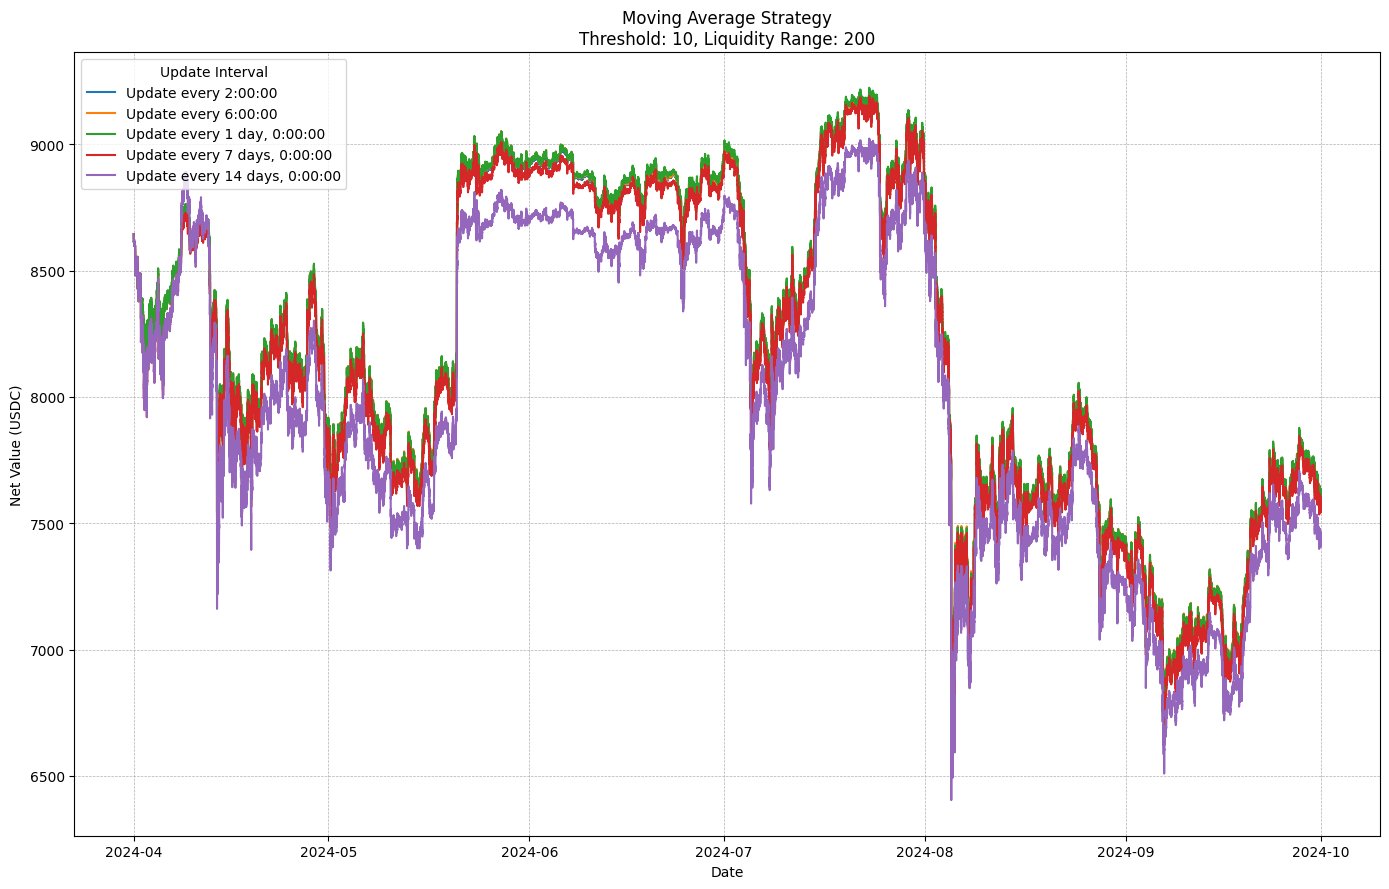

2024-10-30 12:20:44,239 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:20:48,358 - INFO - load file complete, preparing...
2024-10-30 12:20:53,707 - INFO - data has been prepared
2024-10-30 12:20:54,107 - INFO - Qute token is USDC
2024-10-30 12:20:54,108 - INFO - init strategy...
2024-10-30 12:20:54,256 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3100.61it/s]
2024-10-30 12:22:19,246 - INFO - main loop finished
2024-10-30 12:22:23,444 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1848.9482                ETH       :0.70833574               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  442.35365  0.13226859  10400319314274905

Quote by: USDC
Account balance history                           


2024-10-30 12:22:24,685 - INFO - Backtesting finished, execute time 90.58579754829407s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:22:24,888 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:22:29,294 - INFO - load file complete, preparing...
2024-10-30 12:22:34,727 - INFO - data has been prepared
2024-10-30 12:22:35,143 - INFO - Qute token is USDC
2024-10-30 12:22:35,143 - INFO - init strategy...
2024-10-30 12:22:35,294 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3087.71it/s]
2024-10-30 12:24:00,639 - INFO - main loop finished
2024-10-30 12:24:05,418 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1865.4632                ETH       :0.71537767               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  438.88263  0.13123075  10318657345196993

Quote by: USDC
Account balance history                           


2024-10-30 12:24:06,786 - INFO - Backtesting finished, execute time 91.65863919258118s
2024-10-30 12:24:06,981 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:24:11,502 - INFO - load file complete, preparing...
2024-10-30 12:24:17,813 - INFO - data has been prepared
2024-10-30 12:24:18,263 - INFO - Qute token is USDC
2024-10-30 12:24:18,263 - INFO - init strategy...
2024-10-30 12:24:18,430 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:26<00:00, 3048.62it/s]
2024-10-30 12:25:44,886 - INFO - main loop finished
2024-10-30 12:25:49,051 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1828.1836                ETH       :0.68733729               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  451.58062  0.13502746  10617404746453927

Quote by: USDC
Account balance history                           


2024-10-30 12:25:50,271 - INFO - Backtesting finished, execute time 92.00745105743408s
2024-10-30 12:25:50,451 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:25:54,438 - INFO - load file complete, preparing...
2024-10-30 12:25:59,933 - INFO - data has been prepared
2024-10-30 12:26:00,333 - INFO - Qute token is USDC
2024-10-30 12:26:00,333 - INFO - init strategy...
2024-10-30 12:26:00,500 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3132.88it/s]
2024-10-30 12:27:24,615 - INFO - main loop finished
2024-10-30 12:27:29,337 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.0793                ETH       :0.68128260               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  451.58062  0.13502746  10617404746453927

Quote by: USDC
Account balance history                           


2024-10-30 12:27:30,590 - INFO - Backtesting finished, execute time 90.25689601898193s
2024-10-30 12:27:30,774 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-10-30 12:27:34,787 - INFO - load file complete, preparing...
2024-10-30 12:27:40,171 - INFO - data has been prepared
2024-10-30 12:27:40,571 - INFO - Qute token is USDC
2024-10-30 12:27:40,571 - INFO - init strategy...
2024-10-30 12:27:40,722 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:26<00:00, 3049.76it/s]
2024-10-30 12:29:07,129 - INFO - main loop finished
2024-10-30 12:29:11,279 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1743.5995                ETH       :0.65553641               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194700      194840  451.58062  0.13502746  10617404746453927

Quote by: USDC
Account balance history                           


2024-10-30 12:29:12,479 - INFO - Backtesting finished, execute time 91.92240333557129s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

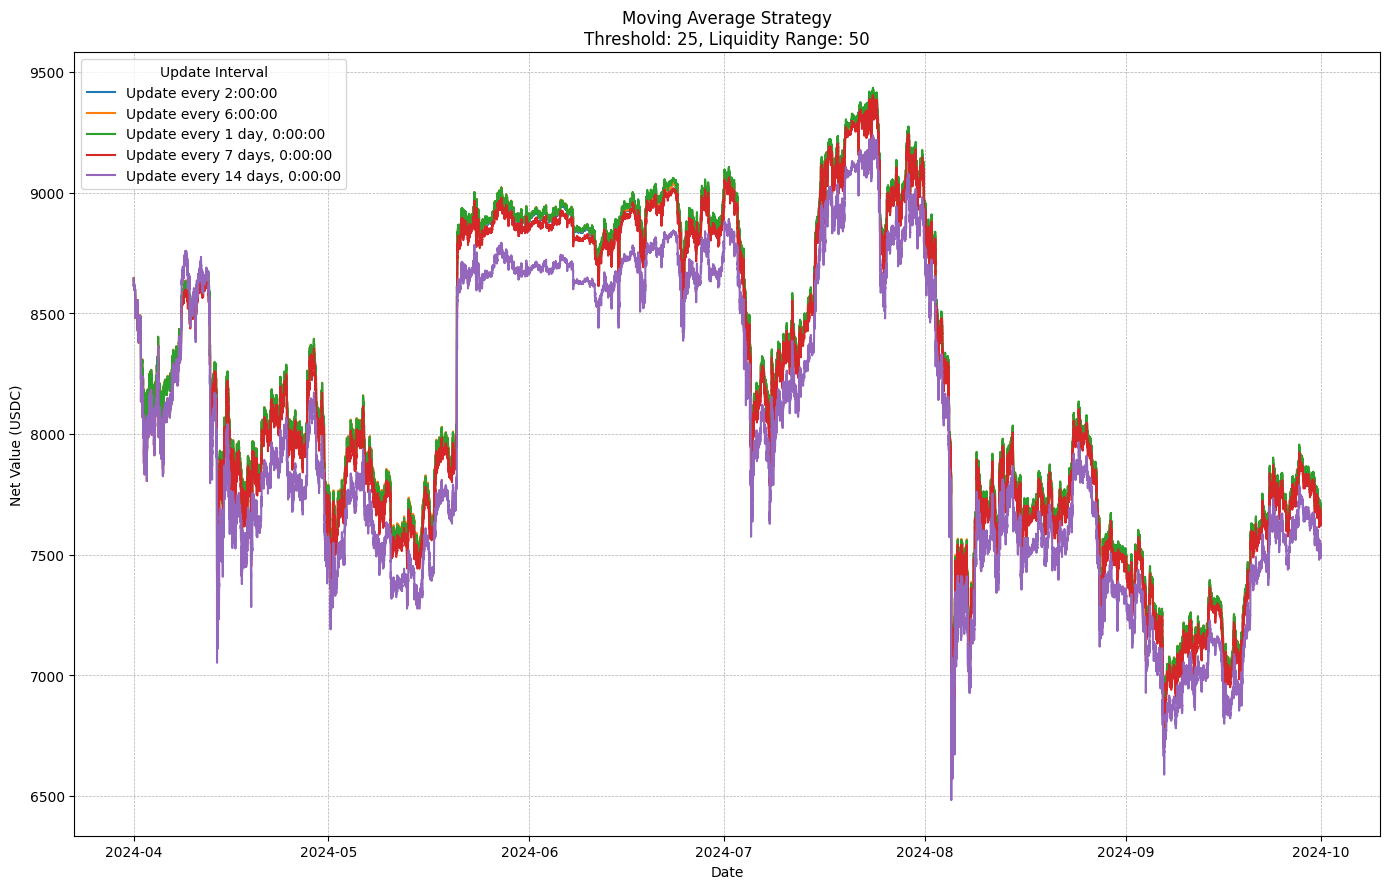

2024-10-30 12:29:13,123 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:29:17,242 - INFO - load file complete, preparing...
2024-10-30 12:29:22,623 - INFO - data has been prepared
2024-10-30 12:29:23,026 - INFO - Qute token is USDC
2024-10-30 12:29:23,026 - INFO - init strategy...
2024-10-30 12:29:23,192 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3079.42it/s]
2024-10-30 12:30:48,767 - INFO - main loop finished
2024-10-30 12:30:53,315 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1863.0696                ETH       :0.71374567               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  380.22691  0.11401975  5002175265545905

Quote by: USDC
Account balance history                           


2024-10-30 12:30:54,613 - INFO - Backtesting finished, execute time 91.58696341514587s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:30:54,827 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:30:59,230 - INFO - load file complete, preparing...
2024-10-30 12:31:04,675 - INFO - data has been prepared
2024-10-30 12:31:05,078 - INFO - Qute token is USDC
2024-10-30 12:31:05,078 - INFO - init strategy...
2024-10-30 12:31:05,244 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3079.46it/s]
2024-10-30 12:32:30,817 - INFO - main loop finished
2024-10-30 12:32:35,453 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1879.4841                ETH       :0.72075449               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  377.24238  0.11312478  4962898828975670

Quote by: USDC
Account balance history                           


2024-10-30 12:32:36,664 - INFO - Backtesting finished, execute time 91.58605456352234s
2024-10-30 12:32:36,836 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:32:40,896 - INFO - load file complete, preparing...
2024-10-30 12:32:46,217 - INFO - data has been prepared
2024-10-30 12:32:46,615 - INFO - Qute token is USDC
2024-10-30 12:32:46,615 - INFO - init strategy...
2024-10-30 12:32:46,767 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3123.44it/s]
2024-10-30 12:34:11,152 - INFO - main loop finished
2024-10-30 12:34:15,902 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1842.7516                ETH       :0.69281435               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  388.16072  0.11639886  5106585461669961

Quote by: USDC
Account balance history                           


2024-10-30 12:34:17,152 - INFO - Backtesting finished, execute time 90.53724908828735s
2024-10-30 12:34:17,339 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:34:21,437 - INFO - load file complete, preparing...
2024-10-30 12:34:26,952 - INFO - data has been prepared
2024-10-30 12:34:27,354 - INFO - Qute token is USDC
2024-10-30 12:34:27,354 - INFO - init strategy...
2024-10-30 12:34:27,524 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3102.12it/s]
2024-10-30 12:35:52,474 - INFO - main loop finished
2024-10-30 12:35:56,641 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.5189                ETH       :0.68671142               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  388.16072  0.11639886  5106585461669961

Quote by: USDC
Account balance history                           


2024-10-30 12:35:57,958 - INFO - Backtesting finished, execute time 90.60456991195679s
2024-10-30 12:35:58,141 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:36:02,142 - INFO - load file complete, preparing...
2024-10-30 12:36:07,593 - INFO - data has been prepared
2024-10-30 12:36:08,005 - INFO - Qute token is USDC
2024-10-30 12:36:08,006 - INFO - init strategy...
2024-10-30 12:36:08,156 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3097.59it/s]
2024-10-30 12:37:33,230 - INFO - main loop finished
2024-10-30 12:37:37,391 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1757.4934                ETH       :0.66076007               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      194990  388.16072  0.11639886  5106585461669961

Quote by: USDC
Account balance history                           


2024-10-30 12:37:38,685 - INFO - Backtesting finished, execute time 90.69369220733643s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

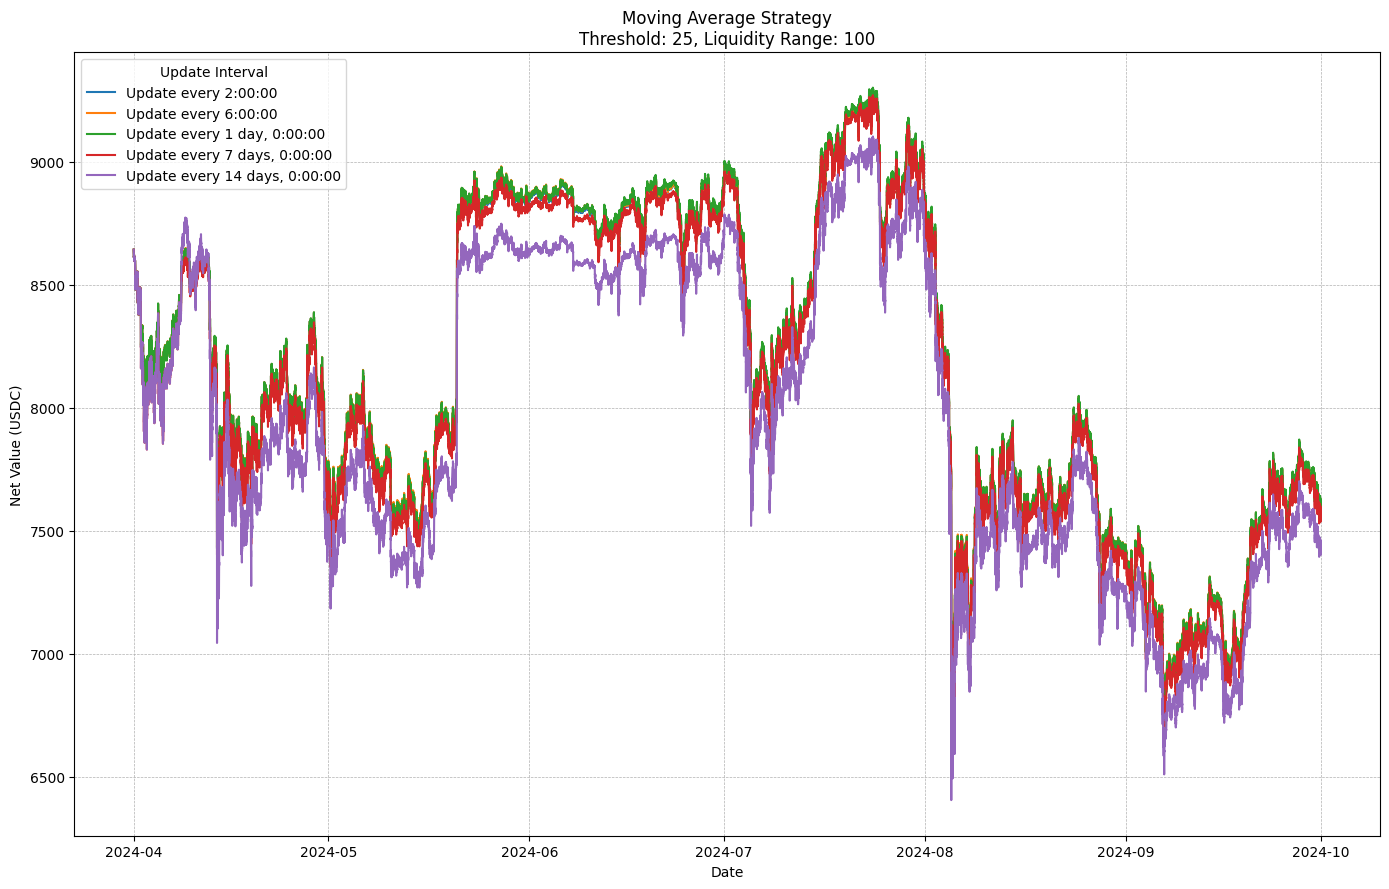

2024-10-30 12:37:39,311 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:37:43,410 - INFO - load file complete, preparing...
2024-10-30 12:37:48,996 - INFO - data has been prepared
2024-10-30 12:37:49,396 - INFO - Qute token is USDC
2024-10-30 12:37:49,396 - INFO - init strategy...
2024-10-30 12:37:49,545 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3075.89it/s]
2024-10-30 12:39:15,218 - INFO - main loop finished
2024-10-30 12:39:19,919 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1869.6978                ETH       :0.71628496               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  352.40812  0.10718522  2468420953631414

Quote by: USDC
Account balance history                           


2024-10-30 12:39:21,177 - INFO - Backtesting finished, execute time 91.78802299499512s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:39:21,398 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:39:25,881 - INFO - load file complete, preparing...
2024-10-30 12:39:31,332 - INFO - data has been prepared
2024-10-30 12:39:31,745 - INFO - Qute token is USDC
2024-10-30 12:39:31,745 - INFO - init strategy...
2024-10-30 12:39:31,899 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3091.62it/s]
2024-10-30 12:40:57,136 - INFO - main loop finished
2024-10-30 12:41:01,917 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1886.0652                ETH       :0.72327824               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  349.64160  0.10634378  2449039229907793

Quote by: USDC
Account balance history                           


2024-10-30 12:41:03,185 - INFO - Backtesting finished, execute time 91.45484685897827s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:41:03,384 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:41:07,453 - INFO - load file complete, preparing...
2024-10-30 12:41:12,833 - INFO - data has been prepared
2024-10-30 12:41:13,237 - INFO - Qute token is USDC
2024-10-30 12:41:13,237 - INFO - init strategy...
2024-10-30 12:41:13,383 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3100.80it/s]
2024-10-30 12:42:38,368 - INFO - main loop finished
2024-10-30 12:42:42,540 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1849.5894                ETH       :0.69538515               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  359.76244  0.10942203  2519944201459329

Quote by: USDC
Account balance history                           


2024-10-30 12:42:43,792 - INFO - Backtesting finished, execute time 90.56187200546265s
2024-10-30 12:42:43,989 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:42:48,091 - INFO - load file complete, preparing...
2024-10-30 12:42:53,521 - INFO - data has been prepared
2024-10-30 12:42:53,904 - INFO - Qute token is USDC
2024-10-30 12:42:53,904 - INFO - init strategy...
2024-10-30 12:42:54,074 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3086.52it/s]
2024-10-30 12:44:19,465 - INFO - main loop finished
2024-10-30 12:44:23,626 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1833.2965                ETH       :0.68925957               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  359.76244  0.10942203  2519944201459329

Quote by: USDC
Account balance history                           


2024-10-30 12:44:24,896 - INFO - Backtesting finished, execute time 90.99175310134888s
2024-10-30 12:44:25,077 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:44:29,078 - INFO - load file complete, preparing...
2024-10-30 12:44:34,557 - INFO - data has been prepared
2024-10-30 12:44:34,973 - INFO - Qute token is USDC
2024-10-30 12:44:34,973 - INFO - init strategy...
2024-10-30 12:44:35,126 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:27<00:00, 3003.78it/s]
2024-10-30 12:46:02,859 - INFO - main loop finished
2024-10-30 12:46:07,032 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1764.0149                ETH       :0.66321193               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194700      195290  359.76244  0.10942203  2519944201459329

Quote by: USDC
Account balance history                           


2024-10-30 12:46:08,296 - INFO - Backtesting finished, execute time 93.33863019943237s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

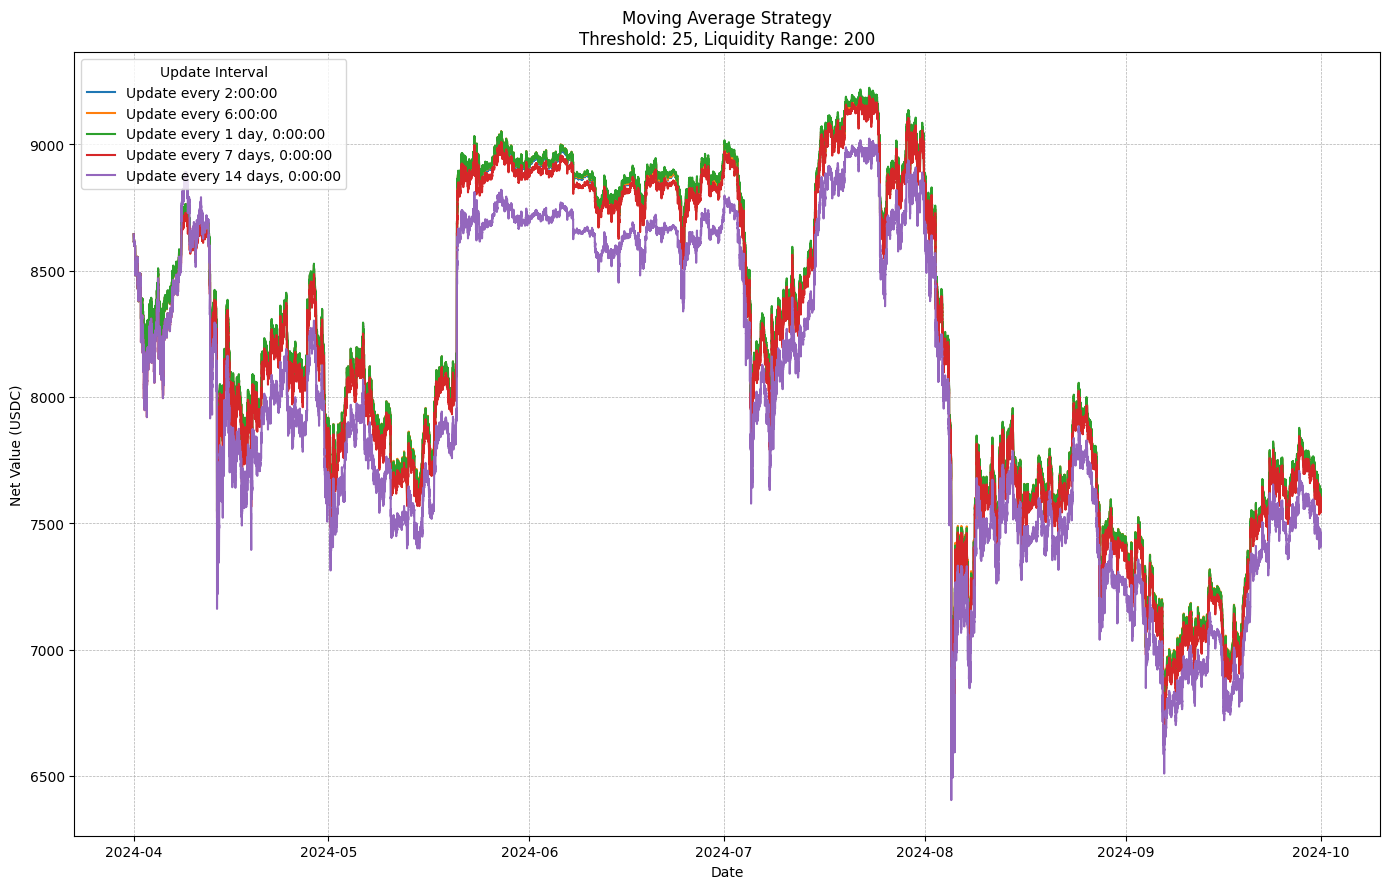

2024-10-30 12:46:08,929 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:46:13,096 - INFO - load file complete, preparing...
2024-10-30 12:46:18,578 - INFO - data has been prepared
2024-10-30 12:46:18,965 - INFO - Qute token is USDC
2024-10-30 12:46:18,965 - INFO - init strategy...
2024-10-30 12:46:19,128 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3085.20it/s]
2024-10-30 12:47:44,542 - INFO - main loop finished
2024-10-30 12:47:48,700 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1818.6426                ETH       :0.69672560               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      194920  365.88701  0.10899925  9881691540212683

Quote by: USDC
Account balance history                           


2024-10-30 12:47:50,101 - INFO - Backtesting finished, execute time 91.13561630249023s
2024-10-30 12:47:50,300 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-10-30 12:47:54,770 - INFO - load file complete, preparing...
2024-10-30 12:48:00,365 - INFO - data has been prepared
2024-10-30 12:48:00,749 - INFO - Qute token is USDC
2024-10-30 12:48:00,749 - INFO - init strategy...
2024-10-30 12:48:00,899 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3095.09it/s]
2024-10-30 12:49:26,041 - INFO - main loop finished
2024-10-30 12:49:30,290 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1787.7564                ETH       :0.68557825               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      194920  365.90787  0.10900546  9882255129533205

Quote by: USDC
Account balance history                           


2024-10-30 12:49:31,570 - INFO - Backtesting finished, execute time 90.82143568992615s
2024-10-30 12:49:31,755 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:49:35,773 - INFO - load file complete, preparing...
2024-10-30 12:49:41,219 - INFO - data has been prepared
2024-10-30 12:49:41,620 - INFO - Qute token is USDC
2024-10-30 12:49:41,621 - INFO - init strategy...
2024-10-30 12:49:41,771 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3116.00it/s]
2024-10-30 12:51:06,341 - INFO - main loop finished
2024-10-30 12:51:10,639 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1781.4906                ETH       :0.66978223               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      194920  365.86645  0.10899312  9881135743298187

Quote by: USDC
Account balance history                           


2024-10-30 12:51:11,942 - INFO - Backtesting finished, execute time 90.33633661270142s
2024-10-30 12:51:12,128 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:51:16,443 - INFO - load file complete, preparing...
2024-10-30 12:51:21,923 - INFO - data has been prepared
2024-10-30 12:51:22,323 - INFO - Qute token is USDC
2024-10-30 12:51:22,323 - INFO - init strategy...
2024-10-30 12:51:22,473 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3119.00it/s]
2024-10-30 12:52:46,962 - INFO - main loop finished
2024-10-30 12:52:51,162 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1786.9202                ETH       :0.67182357               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194770      194920  372.99658  0.11111721  10073832785962625

Quote by: USDC
Account balance history                           


2024-10-30 12:52:52,427 - INFO - Backtesting finished, execute time 90.10950112342834s
2024-10-30 12:52:52,614 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:52:56,644 - INFO - load file complete, preparing...
2024-10-30 12:53:02,060 - INFO - data has been prepared
2024-10-30 12:53:02,462 - INFO - Qute token is USDC
2024-10-30 12:53:02,462 - INFO - init strategy...
2024-10-30 12:53:02,630 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3091.84it/s]
2024-10-30 12:54:27,861 - INFO - main loop finished
2024-10-30 12:54:32,053 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1719.3911                ETH       :0.64643485               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1          liquidity
0      194770      194920  372.99658  0.11111721  10073832785962625

Quote by: USDC
Account balance history                           


2024-10-30 12:54:33,350 - INFO - Backtesting finished, execute time 90.88753485679626s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

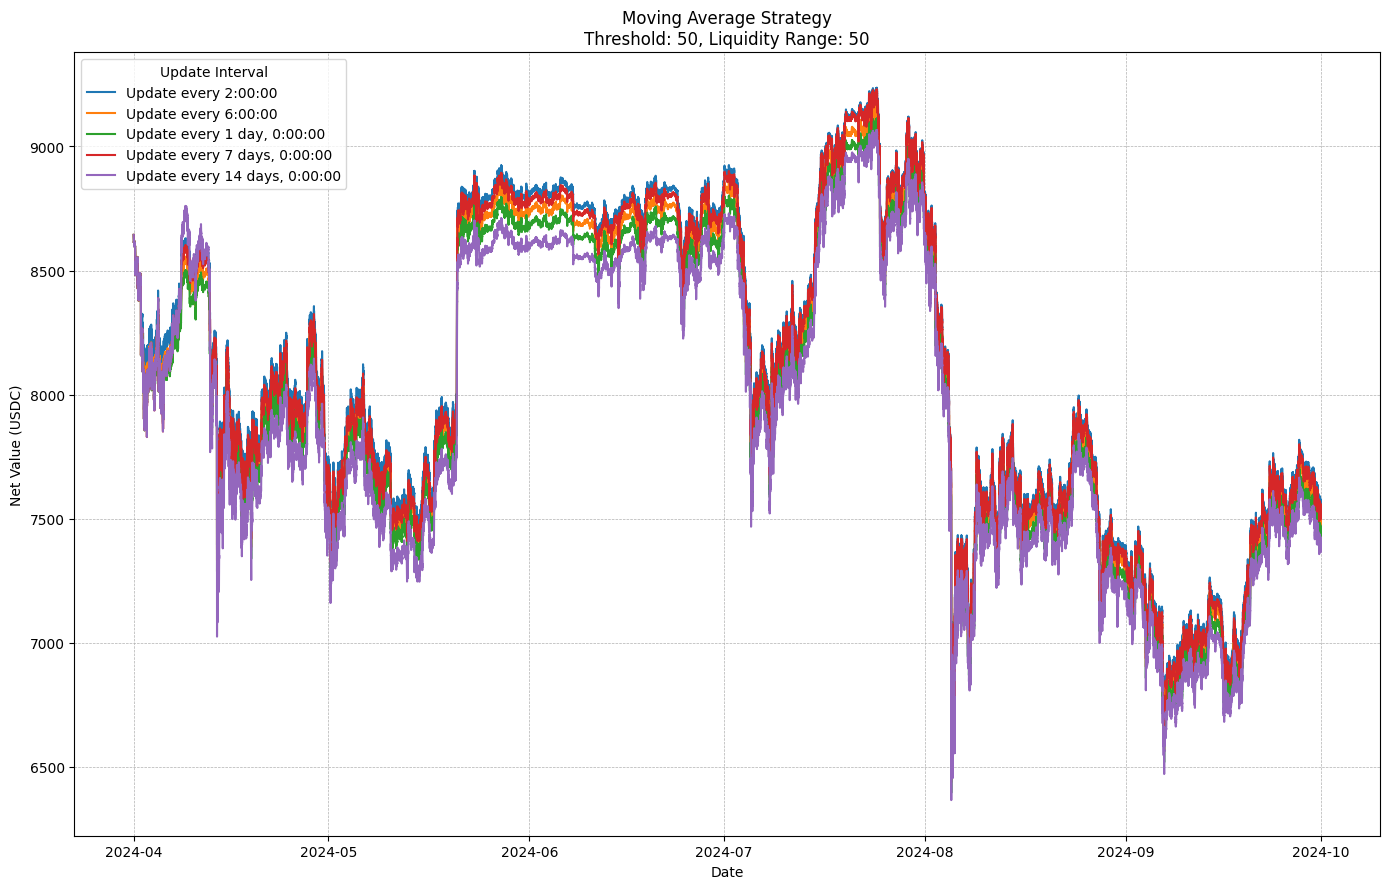

2024-10-30 12:54:33,963 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:54:37,998 - INFO - load file complete, preparing...
2024-10-30 12:54:43,482 - INFO - data has been prepared
2024-10-30 12:54:43,879 - INFO - Qute token is USDC
2024-10-30 12:54:43,879 - INFO - init strategy...
2024-10-30 12:54:44,033 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3093.91it/s]
2024-10-30 12:56:09,207 - INFO - main loop finished
2024-10-30 12:56:14,386 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1843.9060                ETH       :0.70640408               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  353.33195  0.10815455  5062153786146628

Quote by: USDC
Account balance history                           


2024-10-30 12:56:15,818 - INFO - Backtesting finished, execute time 91.9552743434906s


l1                  net_value   tokens              market1                                                                                          price     
l2                                USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982 4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019 4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788 4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423 4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906 4321.749  

2024-10-30 12:56:16,047 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:56:20,788 - INFO - load file complete, preparing...
2024-10-30 12:56:26,318 - INFO - data has been prepared
2024-10-30 12:56:26,715 - INFO - Qute token is USDC
2024-10-30 12:56:26,715 - INFO - init strategy...
2024-10-30 12:56:26,871 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3084.06it/s]
2024-10-30 12:57:52,317 - INFO - main loop finished
2024-10-30 12:57:56,507 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.5908                ETH       :0.69510188               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  353.35209  0.10816071  5062442499450530

Quote by: USDC
Account balance history                           


2024-10-30 12:57:57,822 - INFO - Backtesting finished, execute time 91.12298822402954s
2024-10-30 12:57:58,007 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 12:58:02,155 - INFO - load file complete, preparing...
2024-10-30 12:58:07,554 - INFO - data has been prepared
2024-10-30 12:58:07,954 - INFO - Qute token is USDC
2024-10-30 12:58:07,954 - INFO - init strategy...
2024-10-30 12:58:08,104 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3096.38it/s]
2024-10-30 12:59:33,210 - INFO - main loop finished
2024-10-30 12:59:37,485 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1806.2380                ETH       :0.67908643               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  353.31208  0.10814846  5061869064705608

Quote by: USDC
Account balance history                           


2024-10-30 12:59:38,708 - INFO - Backtesting finished, execute time 90.76725482940674s


l1                  net_value   tokens              market1                                                                                          price     
l2                                USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982 4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019 4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788 4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423 4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906 4321.749  

2024-10-30 12:59:38,929 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 12:59:42,980 - INFO - load file complete, preparing...
2024-10-30 12:59:48,457 - INFO - data has been prepared
2024-10-30 12:59:48,841 - INFO - Qute token is USDC
2024-10-30 12:59:48,841 - INFO - init strategy...
2024-10-30 12:59:48,999 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3086.74it/s]
2024-10-30 13:01:14,371 - INFO - main loop finished
2024-10-30 13:01:18,610 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1812.7594                ETH       :0.68153828               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  360.19970  0.11025675  5160583142162234

Quote by: USDC
Account balance history                           


2024-10-30 13:01:19,898 - INFO - Backtesting finished, execute time 91.05689358711243s
2024-10-30 13:01:20,080 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 13:01:24,131 - INFO - load file complete, preparing...
2024-10-30 13:01:29,545 - INFO - data has been prepared
2024-10-30 13:01:29,947 - INFO - Qute token is USDC
2024-10-30 13:01:29,947 - INFO - init strategy...
2024-10-30 13:01:30,096 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:30<00:00, 2913.44it/s]
2024-10-30 13:03:00,563 - INFO - main loop finished
2024-10-30 13:03:05,352 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1744.2538                ETH       :0.65578243               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195060  360.19970  0.11025675  5160583142162234

Quote by: USDC
Account balance history                           


2024-10-30 13:03:06,623 - INFO - Backtesting finished, execute time 96.67582678794861s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

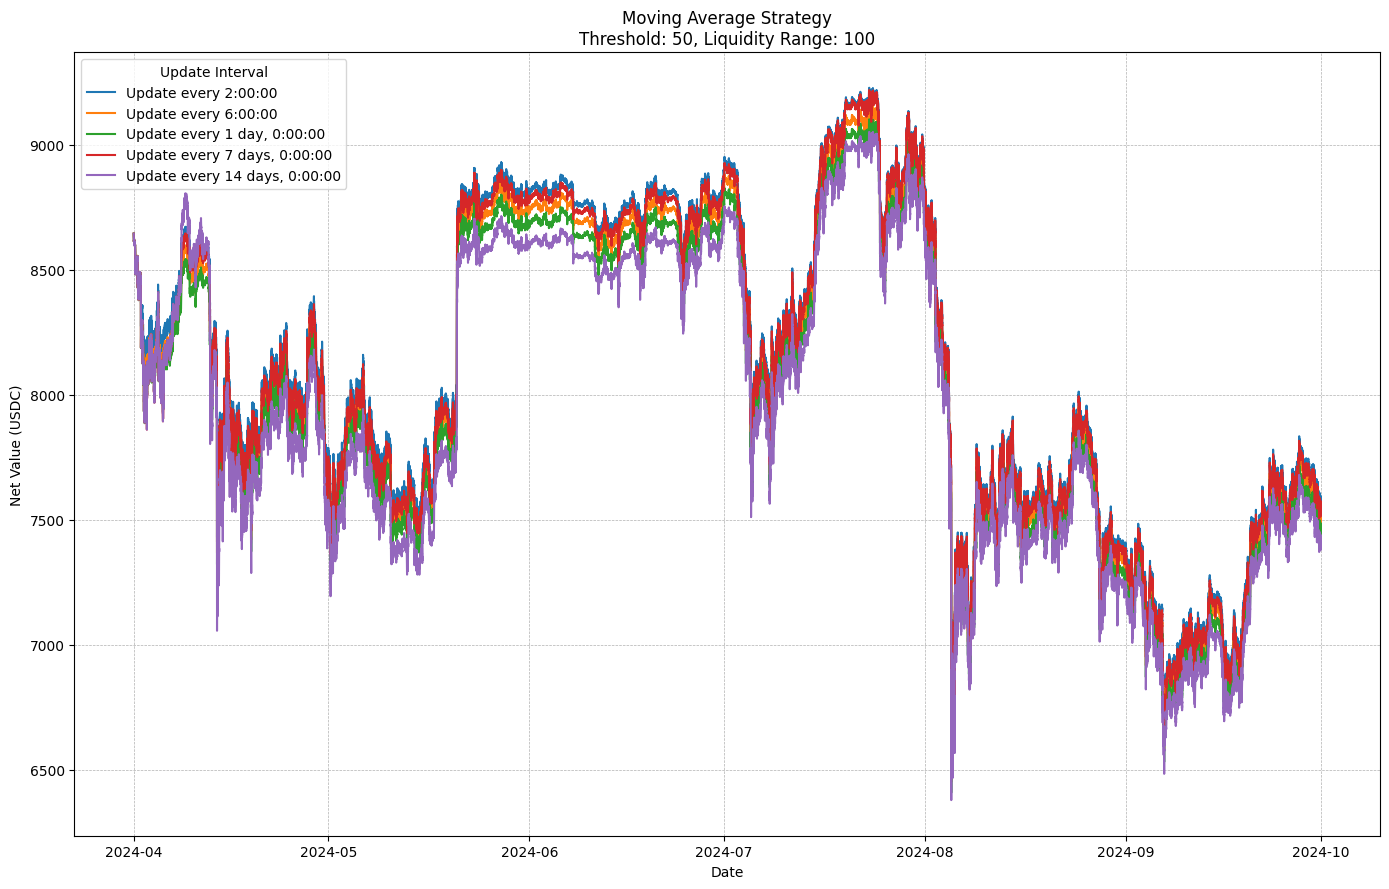

2024-10-30 13:03:07,233 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 13:03:11,368 - INFO - load file complete, preparing...
2024-10-30 13:03:16,749 - INFO - data has been prepared
2024-10-30 13:03:17,132 - INFO - Qute token is USDC
2024-10-30 13:03:17,132 - INFO - init strategy...
2024-10-30 13:03:17,282 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3082.42it/s]
2024-10-30 13:04:42,789 - INFO - main loop finished
2024-10-30 13:04:47,574 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1857.6092                ETH       :0.71165379               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  336.52563  0.10352043  2447982755515956

Quote by: USDC
Account balance history                           


2024-10-30 13:04:48,805 - INFO - Backtesting finished, execute time 91.67282581329346s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 13:04:49,038 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 13:04:53,525 - INFO - load file complete, preparing...
2024-10-30 13:04:59,024 - INFO - data has been prepared
2024-10-30 13:04:59,419 - INFO - Qute token is USDC
2024-10-30 13:04:59,420 - INFO - init strategy...
2024-10-30 13:04:59,572 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:24<00:00, 3101.36it/s]
2024-10-30 13:06:24,541 - INFO - main loop finished
2024-10-30 13:06:28,691 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.0613                ETH       :0.70026760               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  336.54481  0.10352633  2448122373002721

Quote by: USDC
Account balance history                           


2024-10-30 13:06:29,991 - INFO - Backtesting finished, execute time 90.58682513237s


l1                  net_value    tokens             market1                                                                                          price     
l2                                 USDC       ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749 1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749 1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749 1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749 1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  4321.749 

2024-10-30 13:06:30,193 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 13:06:34,206 - INFO - load file complete, preparing...
2024-10-30 13:06:39,589 - INFO - data has been prepared
2024-10-30 13:06:39,990 - INFO - Qute token is USDC
2024-10-30 13:06:39,991 - INFO - init strategy...
2024-10-30 13:06:40,144 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3100.13it/s]
2024-10-30 13:08:05,149 - INFO - main loop finished
2024-10-30 13:08:09,361 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1819.6612                ETH       :0.68413313               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  336.50670  0.10351461  2447845068435083

Quote by: USDC
Account balance history                           


2024-10-30 13:08:10,711 - INFO - Backtesting finished, execute time 90.7385745048523s
2024-10-30 13:08:10,897 - INFO - start load files from 2024-04-01 to 2024-09-30...


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 13:08:15,060 - INFO - load file complete, preparing...
2024-10-30 13:08:20,626 - INFO - data has been prepared
2024-10-30 13:08:21,026 - INFO - Qute token is USDC
2024-10-30 13:08:21,026 - INFO - init strategy...
2024-10-30 13:08:21,194 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3073.35it/s]
2024-10-30 13:09:46,938 - INFO - main loop finished
2024-10-30 13:09:51,081 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1826.7749                ETH       :0.68680764               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  343.06767  0.10553286  2495581737360828

Quote by: USDC
Account balance history                           


2024-10-30 13:09:52,365 - INFO - Backtesting finished, execute time 91.33831691741943s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

2024-10-30 13:09:52,566 - INFO - start load files from 2024-04-01 to 2024-09-30...
2024-10-30 13:09:56,714 - INFO - load file complete, preparing...
2024-10-30 13:10:02,146 - INFO - data has been prepared
2024-10-30 13:10:02,563 - INFO - Qute token is USDC
2024-10-30 13:10:02,563 - INFO - init strategy...
2024-10-30 13:10:02,715 - INFO - start main loop...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 263520/263520 [01:25<00:00, 3094.64it/s]
2024-10-30 13:11:27,869 - INFO - main loop finished
2024-10-30 13:11:32,056 - INFO - Print actuator summary


Final account status                              
Token balance in broker       
USDC      :1757.7397                ETH       :0.66085265               
Position value in markets     
market1(UniLpMarket)
token0    :USDC                     token1    :ETH                      fee(%)    :0.0500                   quote token:USDC                     
positions 
   lower_tick  upper_tick   pending0    pending1         liquidity
0      194770      195370  343.06767  0.10553286  2495581737360828

Quote by: USDC
Account balance history                           


2024-10-30 13:11:33,301 - INFO - Backtesting finished, execute time 90.75438094139099s


l1                  net_value    tokens              market1                                                                                          price     
l2                                 USDC        ETH net_value base_uncollected quote_uncollected base_in_position quote_in_position position_count       ETH USDC
2024-04-01 00:00:00 8643.4982  4321.749  1.1860434         0                0                 0                0                 0              0 3643.8373    1
2024-04-01 00:01:00 8642.2019  4321.749  1.1860434         0                0                 0                0                 0              0 3642.7444    1
2024-04-01 00:02:00 8639.1788  4321.749  1.1860434         0                0                 0                0                 0              0 3640.1955    1
2024-04-01 00:03:00 8640.0423  4321.749  1.1860434         0                0                 0                0                 0              0 3640.9236    1
2024-04-01 00:04:00  8640.906  432

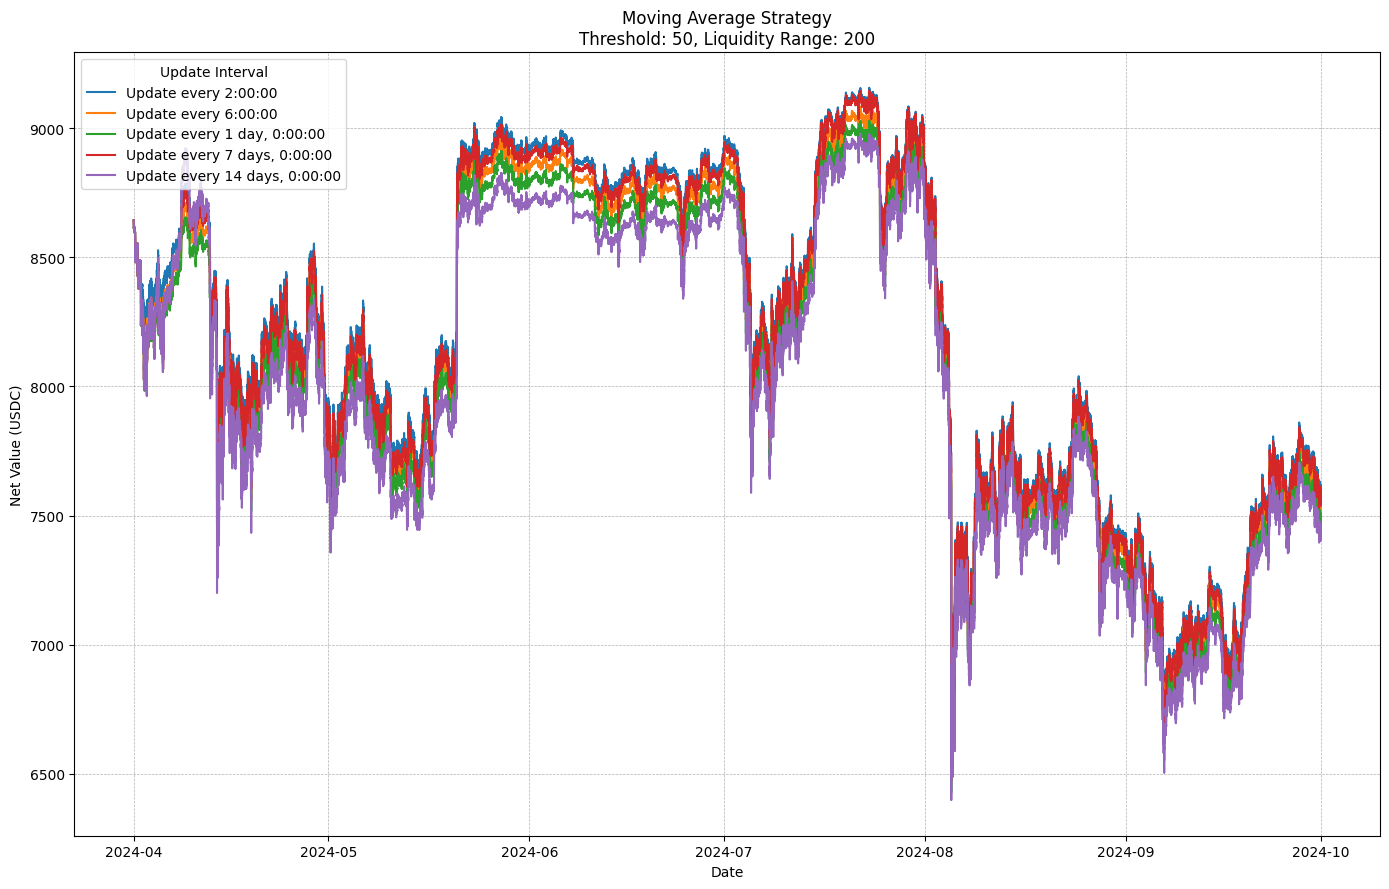

In [3]:
# Token and Market setup
usdc = TokenInfo(name="usdc", decimal=6)
eth = TokenInfo(name="eth", decimal=18)
pool_address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"
market_key = MarketInfo("market1")
start_date = date(2024, 4, 1)
end_date = date(2024, 9, 30)

# Load market data function
def load_market_data(market, data_path="../data"):
    market.data_path = data_path
    market.load_data(
        chain=ChainType.ethereum.name,
        contract_addr=pool_address,
        start_date=start_date,
        end_date=end_date,
    )
    return market

# Define Moving Average Strategy with dynamic thresholds and ranges
class MovingAverageStrategy(Strategy):
    def __init__(self, threshold=25, liquidity_range=100, update_interval=timedelta(days=1)):
        super().__init__()
        self.threshold = threshold
        self.liquidity_range = liquidity_range
        self.update_interval = update_interval

    def initialize(self):
        self.add_column(market_key, "sma", simple_moving_average(self.data[market_key].price, window=timedelta(days=1)))
        self.triggers.append(PeriodTrigger(time_delta=self.update_interval, trigger_immediately=True, do=self.rebalance))

    def rebalance(self, row_data: RowData):
        self.markets[market_key].even_rebalance(row_data.market_status[market_key].price)

    def on_bar(self, row_data: RowData):
        lp_market: UniLpMarket = self.markets[market_key]
        current_price = row_data.market_status[market_key].price
        ma_price = self.data[market_key].loc[row_data.timestamp]["sma"]
        ma_price = row_data.market_status[market_key].price if math.isnan(ma_price) else ma_price

        # Strategy based on moving average threshold and liquidity range
        if current_price > ma_price + self.threshold and len(lp_market.positions) < 1:
            lp_market.remove_all_liquidity()
            lp_market.add_liquidity(current_price, current_price + self.liquidity_range)
        elif current_price < ma_price - self.threshold and len(lp_market.positions) < 1:
            lp_market.remove_all_liquidity()
            lp_market.add_liquidity(current_price - self.liquidity_range, current_price)

# Function to run strategy with varying parameters
def run_strategy(threshold, liquidity_range, update_interval):
    market = load_market_data(UniLpMarket(market_key, UniV3Pool(usdc, eth, 0.05, usdc)))
    actuator = Actuator()
    actuator.broker.add_market(market)
    actuator.broker.set_balance(usdc, 5000)
    actuator.broker.set_balance(eth, 1)
    actuator.strategy = MovingAverageStrategy(threshold=threshold, liquidity_range=liquidity_range, update_interval=update_interval)
    actuator.set_price(market.get_price_from_data())
    actuator.run()
    
    # Capture and return net value time series
    return actuator.account_status_df["net_value"]

# Parameter sets
thresholds = [10, 25, 50]
liquidity_ranges = [50, 100, 200]
update_intervals = [timedelta(hours=2), timedelta(hours=6), timedelta(days=1), timedelta(days=7), timedelta(days=14)]

# Loop through parameter combinations and plot results
for threshold in thresholds:
    for liquidity_range in liquidity_ranges:
        plt.figure(figsize=(14, 9))
        for update_interval in update_intervals:
            net_value_series = run_strategy(threshold, liquidity_range, update_interval)
            plt.plot(net_value_series.index, net_value_series, label=f"Update every {update_interval}")

        # Customize and display the plot for each threshold-liquidity range combination
        plt.title(f"Moving Average Strategy\nThreshold: {threshold}, Liquidity Range: {liquidity_range}")
        plt.xlabel("Date")
        plt.ylabel("Net Value (USDC)")
        plt.legend(title="Update Interval", loc="upper left", fontsize=10)
        plt.grid(visible=True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
